In [60]:
import pandas as pd
# base
df = pd.read_excel('/content/Investigadores_Consolidado.xlsx')

In [61]:
df_2021 = df[df['ANO_CONVO'].astype(str).str.contains('2021')]
display(df_2021.head())

,ID_CONVOCATORIA,NME_CONVOCATORIA,ANO_CONVO,ID_PERSONA_PR,ID_AREA_CON_PR,NME_ESP_AREA_PR,NME_AREA_PR,NME_GRAN_AREA_PR,NME_GENERO_PR,NME_PAIS_NAC_PR,...,EDAD_ANOS_PR,NME_PAIS_RES_PR,NME_REGION_RES_PR,NME_DEPARTAMENTO_RES_PR,NME_MUNICIPIO_RES_PR,COD_DANE_RES_PR,ID_VICTIMA_CONFLICTO,TXT_GRUPO_ETNICO,TXT_POBLACION_DISCA,INST_FILIA
29797,21,Convocatoria 894 de 2021,25/02/2021,157791,6D07,Arquitectura y Urbanismo,Arte,Humanidades,Masculino,Colombia,...,60.75,Colombia,Eje Cafetero,Antioquia,Medellín,5001.0,No,Ningún grupo étnico,Ninguna,NaN
29798,21,Convocatoria 894 de 2021,25/02/2021,350109,6A01,Historia,Historia y Arqueología,Humanidades,Femenino,Exterior,...,42.50,Exterior,Exterior,Exterior,Exterior,NaN,No registra,No disponible,No disponible,NaN
29799,21,Convocatoria 894 de 2021,25/02/2021,38164,5B01,Economía,Economía y Negocios,Ciencias Sociales,Masculino,Colombia,...,61.91,Colombia,Pacífico,Valle del Cauca,Cali,76001.0,No,Ningún grupo étnico,Ninguna,UNIVERSIDAD DEL VALLE
29800,21,Convocatoria 894 de 2021,25/02/2021,19402,1D03,Química Física,Ciencias Químicas,Ciencias Naturales,Masculino,Colombia,...,67.66,Colombia,Caribe,Córdoba,Montería,23001.0,No,Ningún grupo étnico,Ninguna,UNIVERSIDAD DE CORDOBA
29801,21,Convocatoria 894 de 2021,25/02/2021,33189,1C06,Óptica,Ciencias Físicas,Ciencias Naturales,Masculino,Colombia,...,42.00,Colombia,Eje Cafetero,Antioquia,Medellín,5001.0,No,Ningún grupo étnico,Ninguna,UNIVERSIDAD DE ANTIOQUIA


In [62]:
print("Dimensiones 2021:")
print(df_2021.shape)

print(" Datos 2021:")
display(df_2021.describe())

Dimensiones 2021:
(21094, 30)
 Datos 2021:


,ID_CONVOCATORIA,ID_PERSONA_PR,COD_DANE_NAC_PR,NRO_ORDEN_FORM_PR,ORDEN_CLAS_PR,EDAD_ANOS_PR,COD_DANE_RES_PR
count,21094.0,2.109400e+04,20070.000000,21094.000000,21094.000000,21093.000000,20343.000000
mean,21.0,8.371090e+05,29270.129696,16.470940,12.518157,44.634622,25854.856707
std,0.0,5.705953e+05,26314.479449,1.005218,0.749359,13.354573,25427.349779
min,21.0,2.000000e+01,5.000000,0.000000,12.000000,17.580000,5.000000
25%,21.0,2.588450e+05,11001.000000,16.000000,12.000000,36.910000,11001.000000
50%,21.0,8.288935e+05,15001.000000,17.000000,12.000000,43.080000,11001.000000
75%,21.0,1.397125e+06,54001.000000,17.000000,13.000000,51.250000,47001.000000
max,21.0,2.010112e+06,99001.000000,18.000000,15.000000,956.250000,97001.000000


El conjunto de datos de 2021 tiene **21.094 registros y 30 variables**

**NRO_ORDEN_FORM_PR (nivel de formación, jerarquizado):** Tiene Rango de 0 a 18. Con la mayoría de valores entre 16 y 17.

**EDAD_ANOS_PR (edad de los investigadores)**
Tiene un Rango de 17.6 a 956 años.
Existen valores atípicos en la edad máxima.


In [63]:
# Faltantes
missing_values = df_2021.isnull().sum()

# Columnas con faltantes
print("Columns with missing values and their counts:")
print(missing_values[missing_values > 0])

Columns with missing values and their counts:
COD_DANE_NAC_PR    1024
EDAD_ANOS_PR          1
COD_DANE_RES_PR     751
INST_FILIA         2318
dtype: int64


In [64]:
# Revision de duplicados
duplicate_rows = df_2021.duplicated().sum()
print("Filas duplicadas:", duplicate_rows)

Filas duplicadas: 0


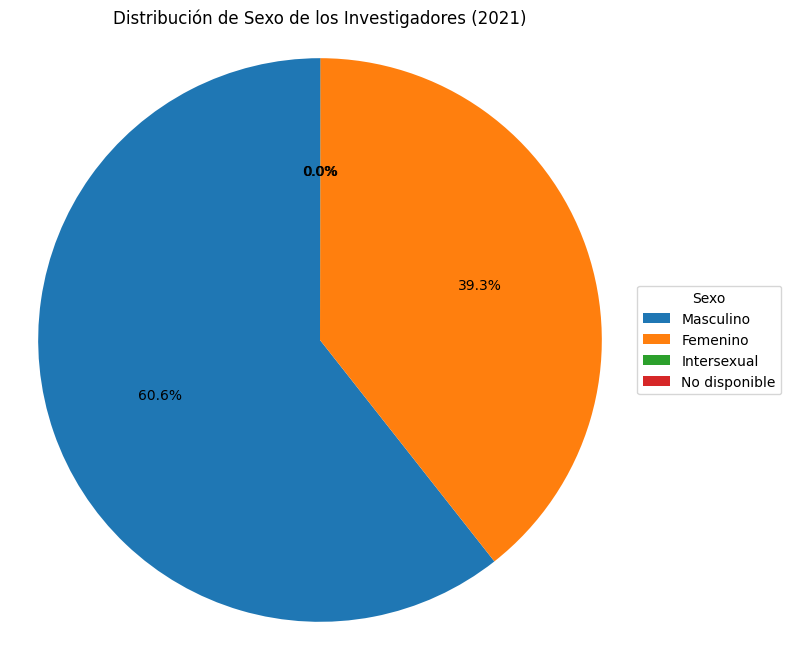

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each gender
gender_counts = df_2021['NME_GENERO_PR'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts.values, labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Sexo de los Investigadores (2021)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(gender_counts.index, title="Sexo", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [66]:
df_2021['NME_GENERO_PR'].value_counts()

,count
NME_GENERO_PR,
Masculino,12787
Femenino,8298
Intersexual,5
No disponible,4


Distribución por sexo de los investigadores en el año 2021

El 60,6% corresponde a hombres, mientras que el 39,3% son mujeres y menos del 0,1% se identifica como intersexual o no reporta el dato. Este patrón refleja un predominio masculino en la comunidad científica.

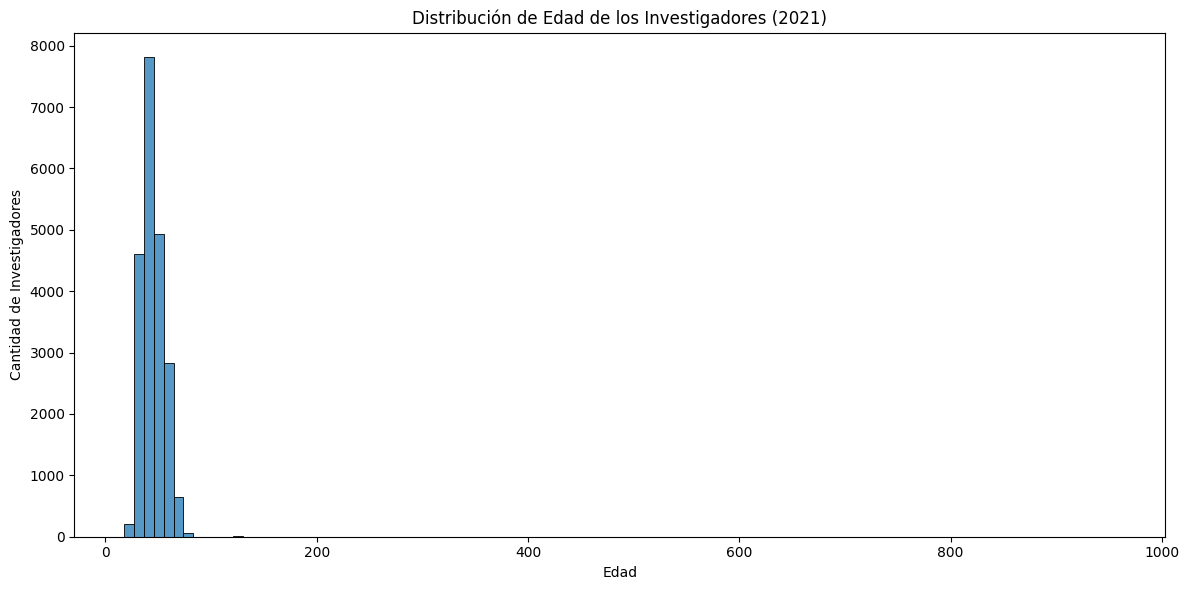

In [67]:
plt.figure(figsize=(12, 6))
sns.histplot(df_2021['EDAD_ANOS_PR'].dropna(), bins=100, kde=False) # Increased the number of bins significantly
plt.title('Distribución de Edad de los Investigadores (2021)')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Investigadores')
# Removed xlim to show the full range of ages
plt.tight_layout()
plt.show()

In [68]:
df_over_100 = df_2021[df_2021['EDAD_ANOS_PR'] > 100]
print("Investigadores con edad mayor a 100 años:")
display(df_over_100)

Investigadores con edad mayor a 100 años:


,ID_CONVOCATORIA,NME_CONVOCATORIA,ANO_CONVO,ID_PERSONA_PR,ID_AREA_CON_PR,NME_ESP_AREA_PR,NME_AREA_PR,NME_GRAN_AREA_PR,NME_GENERO_PR,NME_PAIS_NAC_PR,...,EDAD_ANOS_PR,NME_PAIS_RES_PR,NME_REGION_RES_PR,NME_DEPARTAMENTO_RES_PR,NME_MUNICIPIO_RES_PR,COD_DANE_RES_PR,ID_VICTIMA_CONFLICTO,TXT_GRUPO_ETNICO,TXT_POBLACION_DISCA,INST_FILIA
29864,21,Convocatoria 894 de 2021,25/02/2021,456,5B04,Negocios y Management,Economía y Negocios,Ciencias Sociales,Masculino,Colombia,...,229.33,Colombia,Distrito Capital,"Bogotá, D. C.","Bogotá, D.C.",11001.0,No,Ningún grupo étnico,Ninguna,UNIVERSIDAD MILITAR NUEVA GRANADA
29955,21,Convocatoria 894 de 2021,25/02/2021,1908,5H04,Medios y Comunicación Social,Periodismo y Comunicaciones,Ciencias Sociales,Masculino,Colombia,...,230.16,Colombia,Distrito Capital,"Bogotá, D. C.","Bogotá, D.C.",11001.0,No,Ningún grupo étnico,Ninguna,UNIVERSIDAD DE LA SABANA
39119,21,Convocatoria 894 de 2021,25/02/2021,671878,3B11,Cirugía,Medicina Clínica,Ciencias Médicas y de la Salud,Masculino,Colombia,...,121.00,Colombia,Distrito Capital,"Bogotá, D. C.","Bogotá, D.C.",11001.0,No,Ningún grupo étnico,Ninguna,HOSPITAL UNIVERSITARIO SAN IGNACIO
39123,21,Convocatoria 894 de 2021,25/02/2021,672033,3B11,Cirugía,Medicina Clínica,Ciencias Médicas y de la Salud,Masculino,Colombia,...,121.00,Colombia,Distrito Capital,"Bogotá, D. C.","Bogotá, D.C.",11001.0,No,Ningún grupo étnico,Ninguna,NaN
39129,21,Convocatoria 894 de 2021,25/02/2021,672424,3B09,Anestesiología,Medicina Clínica,Ciencias Médicas y de la Salud,Masculino,Colombia,...,121.41,Colombia,Distrito Capital,"Bogotá, D. C.","Bogotá, D.C.",11001.0,No,Ningún grupo étnico,Ninguna,HOSPITAL UNIVERSITARIO SAN IGNACIO
43448,21,Convocatoria 894 de 2021,25/02/2021,1336611,1F01,Biología Celular y Microbiología,Ciencias Biológicas,Ciencias Naturales,Masculino,Colombia,...,124.25,Colombia,Caribe,Sucre,Sincelejo,70001.0,No,Ningún grupo étnico,Ninguna,NaN
44653,21,Convocatoria 894 de 2021,25/02/2021,1367977,3B18,Endocrinología y Metabolismo (Incluye Diabetes...,Medicina Clínica,Ciencias Médicas y de la Salud,Masculino,Colombia,...,351.66,Colombia,Centro Oriente,Santander,Bucaramanga,68001.0,No,Ningún grupo étnico,Ninguna,UNIVERSIDAD INDUSTRIAL DE SANTANDER
45405,21,Convocatoria 894 de 2021,25/02/2021,1388765,5B04,Negocios y Management,Economía y Negocios,Ciencias Sociales,Femenino,Colombia,...,956.25,Colombia,Caribe,La Guajira,Riohacha,44001.0,Sí,Ningún grupo étnico,Ninguna,NaN
48981,21,Convocatoria 894 de 2021,25/02/2021,1543134,1F01,Biología Celular y Microbiología,Ciencias Biológicas,Ciencias Naturales,Masculino,Colombia,...,830.33,Exterior,Exterior,Exterior,Exterior,NaN,No registra,No disponible,No disponible,FUNDACION INSTITUTO DE INMUNOLOGIA DE COLOMBIA
49277,21,Convocatoria 894 de 2021,25/02/2021,1562611,2C01,Ingeniería Mecánica,Ingeniería Mecánica,Ingeniería y Tecnología,Masculino,Colombia,...,245.91,Colombia,Distrito Capital,"Bogotá, D. C.","Bogotá, D.C.",11001.0,No registra,No disponible,No disponible,UNIVERSIDAD SANTO TOMAS


Edad

La mayoría de los investigadores se encuentra entre los 30 y 60 años, es decir, en la etapa más productiva de la vida académica y científica. Sin embargo, se identifican valores atípicos con edades superiores a 100 años, lo que puede obedecer a errores de digitación o problemas en la calidad de los datos.

Se necesita realizar un proceso de depuración antes de utilizar la información en análisis avanzados.

In [69]:
df_2021_filtered = df_2021[df_2021['EDAD_ANOS_PR'] <= 100].copy()
print("Dimensiones del dataframe después de eliminar registros con edad > 100:")
display(df_2021_filtered.shape)

Dimensiones del dataframe después de eliminar registros con edad > 100:


(21083, 30)

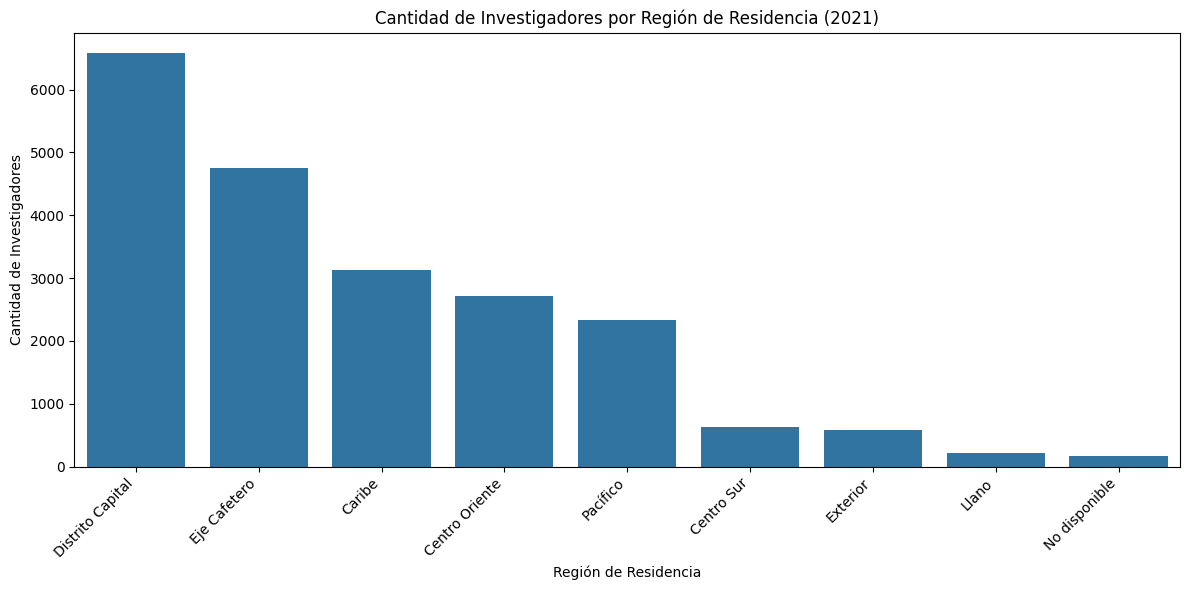

In [70]:
# Count the occurrences of each region of residence in the filtered data
region_counts_filtered = df_2021_filtered['NME_REGION_RES_PR'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts_filtered.index, y=region_counts_filtered.values)
plt.title('Cantidad de Investigadores por Región de Residencia (2021)')
plt.xlabel('Región de Residencia')
plt.ylabel('Cantidad de Investigadores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

La distribución muestra una alta concentración de investigadores en el Distrito Capital, con más de 6.000 registros.

Otras regiones con presencia significativa son el Eje Cafetero, Caribe y Centro Oriente, mientras que regiones como los Llanos y el Centro Sur tienen una representación muy baja. Se evidencia un fenómeno de centralización en Bogotá y otras zonas urbanas.

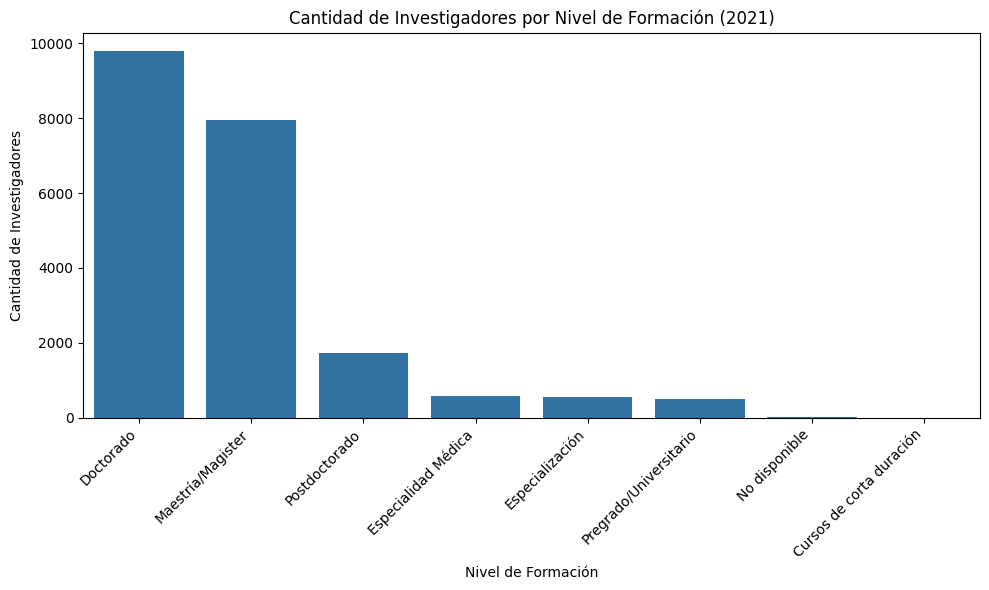

In [71]:
# Count the occurrences of each education level
education_counts = df_2021['NME_NIV_FORM_PR'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Cantidad de Investigadores por Nivel de Formación (2021)')
plt.xlabel('Nivel de Formación')
plt.ylabel('Cantidad de Investigadores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Nivel de formación

La mayor parte de los investigadores posee títulos de Maestría o Doctorado, mientras que los Postdoctorados conforman un grupo pequeño pero relevante.

Los investigadores con formación de pregrado o especialización son minoría. Esto indica que el sistema está compuesto principalmente por personas altamente calificadas, con un nivel de especialización elevado.

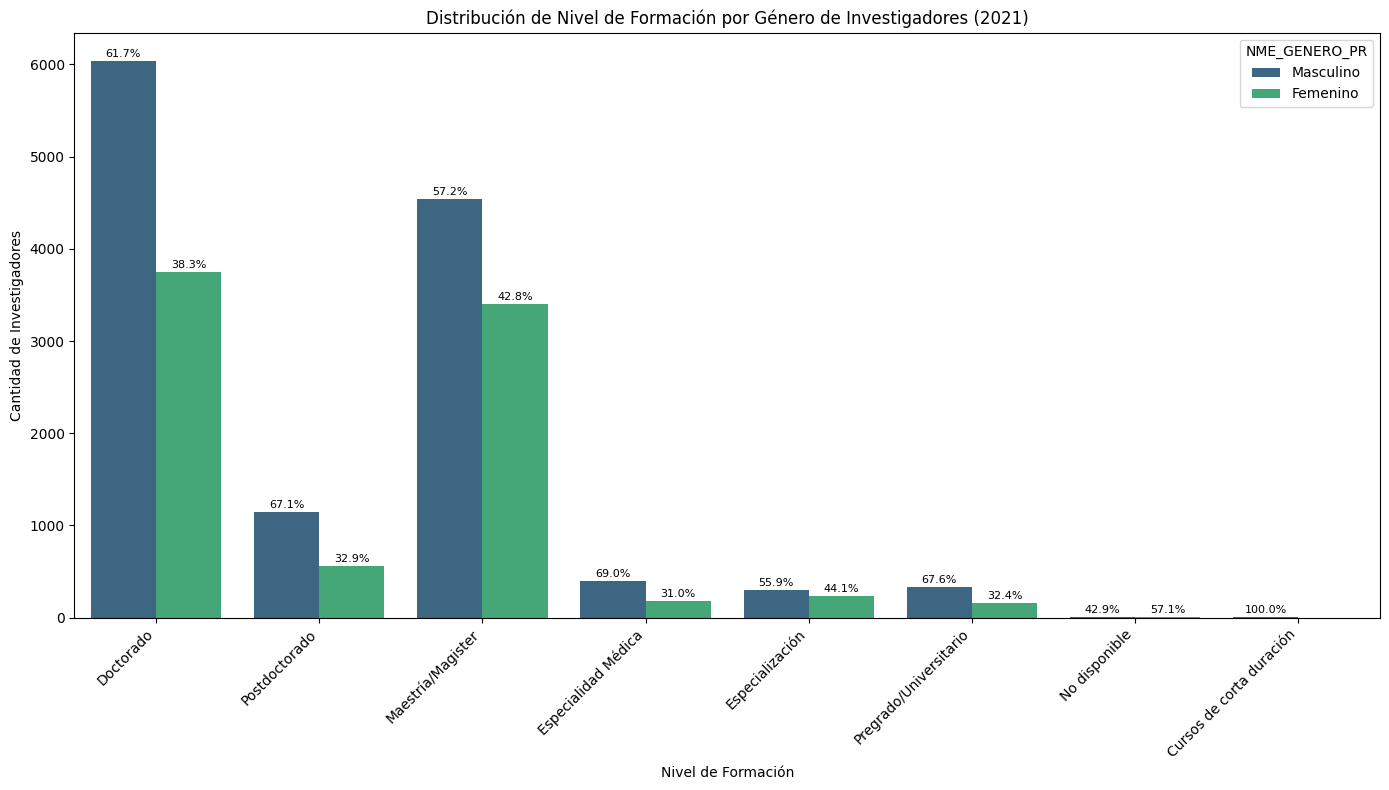

In [72]:
plt.figure(figsize=(14, 8)) # Increased figure size for better readability with annotations
ax = sns.countplot(data=df_2021_gender_filtered, x='NME_NIV_FORM_PR', hue='NME_GENERO_PR', palette='viridis')

plt.title('Distribución de Nivel de Formación por Género de Investigadores (2021)')
plt.xlabel('Nivel de Formación')
plt.ylabel('Cantidad de Investigadores')
plt.xticks(rotation=45, ha='right')

# Add percentages to the bars
total_counts = df_2021_gender_filtered['NME_NIV_FORM_PR'].value_counts()

for container in ax.containers:
    for patch in container.patches:
        width = patch.get_width()
        height = patch.get_height()
        if height > 0: # Avoid annotating bars with zero height
            # Get the education level and gender for the current bar
            education_level = patch.get_x() + width / 2
            gender = container.get_label()

            # Find the corresponding total count for this education level
            edu_level_name = ax.get_xticklabels()[int(patch.get_x() + 0.5)].get_text() # Get the text label
            if edu_level_name in total_counts:
                total = total_counts[edu_level_name]
                percentage = (height / total) * 100
                ax.annotate(f'{percentage:.1f}%', (patch.get_x() + patch.get_width() / 2., height),
                            ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=8)

plt.tight_layout()
plt.show()

Al analizar el nivel de formación por género, se observa que los hombres tienen una mayor proporción en los niveles más altos (Doctorado y Postdoctorado), mientras que las mujeres están más balanceadas en Maestría.

/tmp/ipython-input-2159756096.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




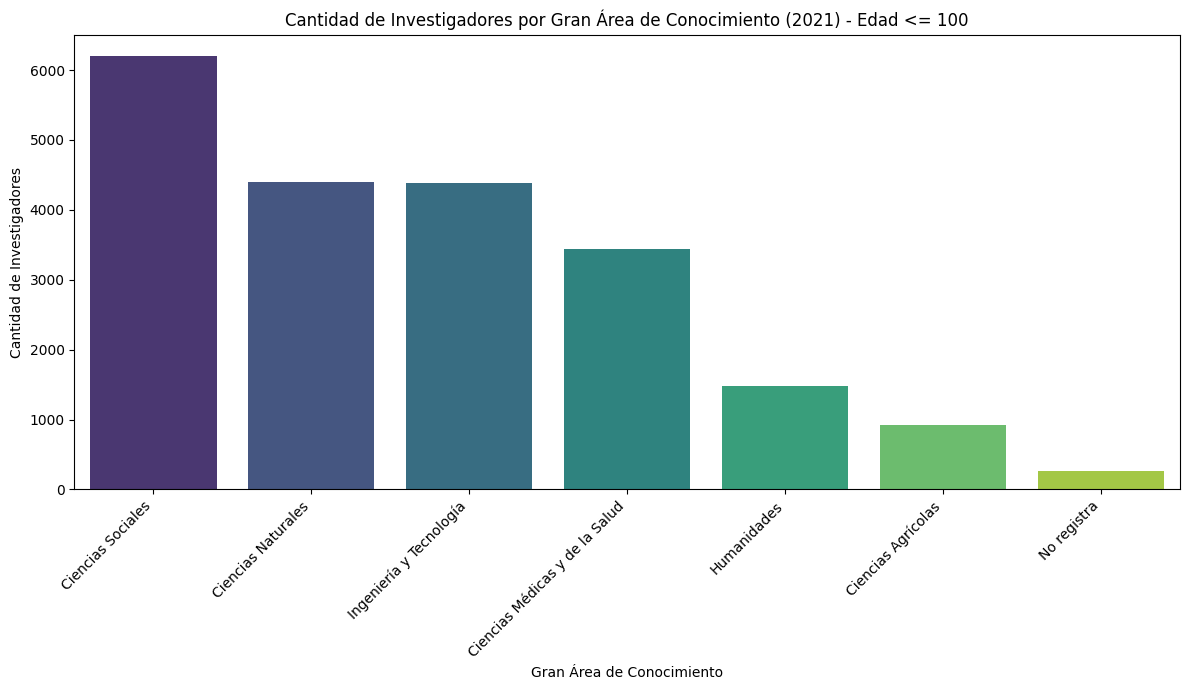

In [73]:
# Count the occurrences of each broad area of knowledge
broad_area_counts = df_2021_filtered['NME_GRAN_AREA_PR'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=broad_area_counts.index, y=broad_area_counts.values, palette='viridis')
plt.title('Cantidad de Investigadores por Gran Área de Conocimiento (2021) - Edad <= 100')
plt.xlabel('Gran Área de Conocimiento')
plt.ylabel('Cantidad de Investigadores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

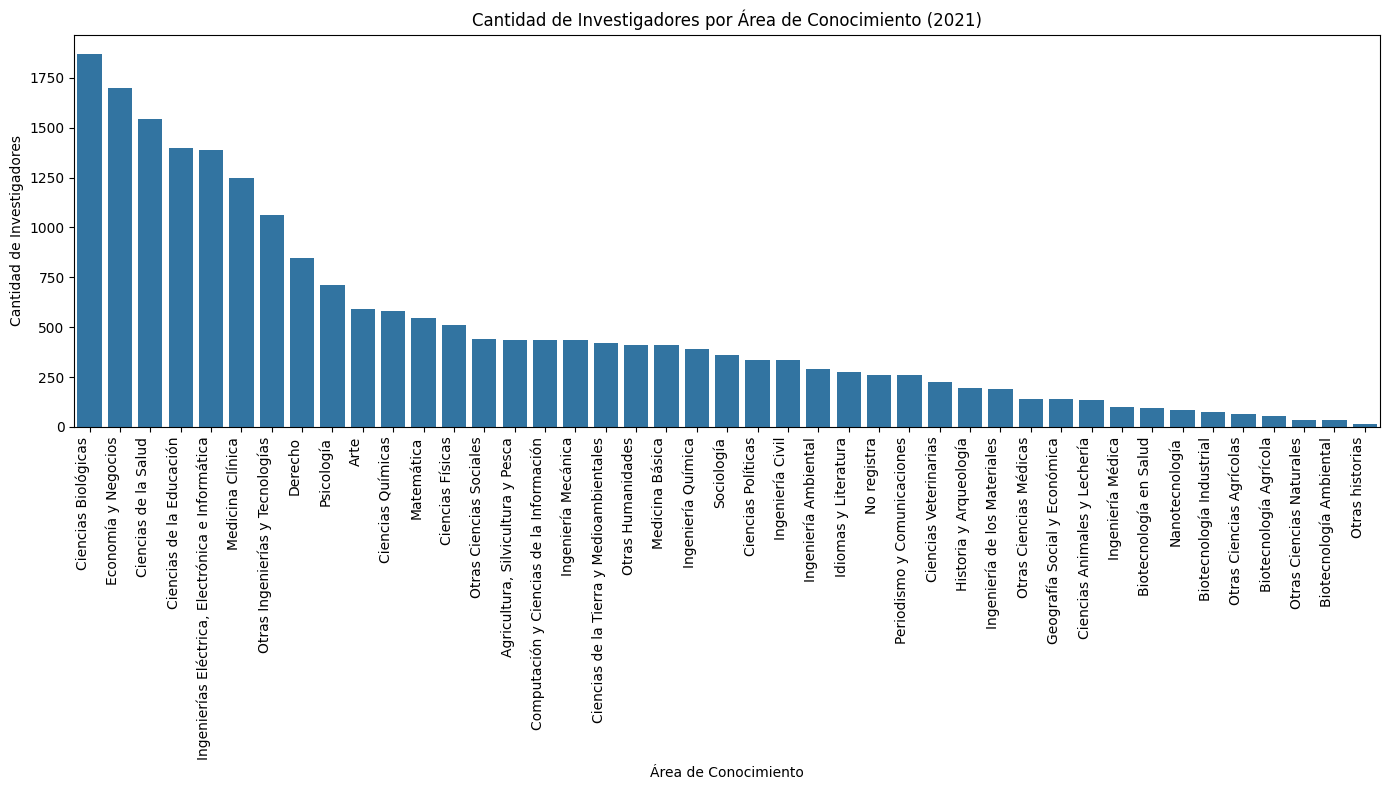

In [74]:
# Count the occurrences of each specific area of knowledge in the filtered data
area_counts = df_2021_filtered['NME_AREA_PR'].value_counts()

# Create a bar plot
plt.figure(figsize=(14, 8)) # Increased figure size
sns.barplot(x=area_counts.index, y=area_counts.values)
plt.title('Cantidad de Investigadores por Área de Conocimiento (2021)')
plt.xlabel('Área de Conocimiento')
plt.ylabel('Cantidad de Investigadores')
plt.xticks(rotation=90, ha='right') # Rotate labels for readability
plt.tight_layout()
plt.show()

Areas de conocimiento

La mayor parte de los investigadores se concentra en Ciencias Sociales, seguidas por Ciencias Naturales y por Ingeniería y Tecnología.

Las Humanidades y Ciencias Agrícolas presentan una participación mucho menor. Esto refleja una orientación del sistema hacia áreas aplicadas y sociales.

/tmp/ipython-input-4076498915.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




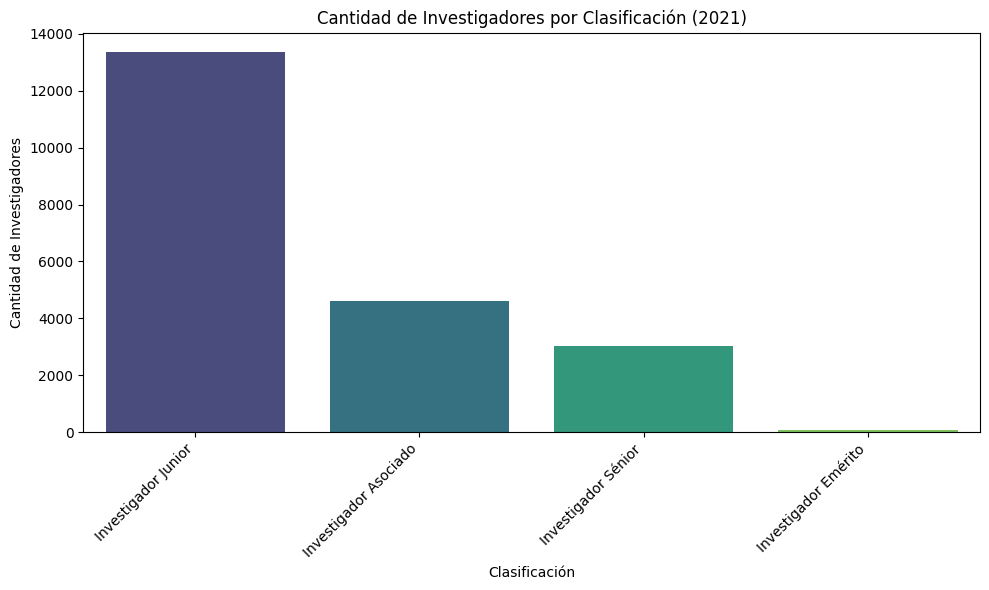

In [75]:
# Count the occurrences of each classification
classification_counts = df_2021_filtered['NME_CLASIFICACION_PR'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=classification_counts.index, y=classification_counts.values, palette='viridis')
plt.title('Cantidad de Investigadores por Clasificación (2021)')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de Investigadores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Hay un mayor número de profesionales en etapas iniciales y medias, y menos en los niveles más altos de experiencia y reconocimiento.

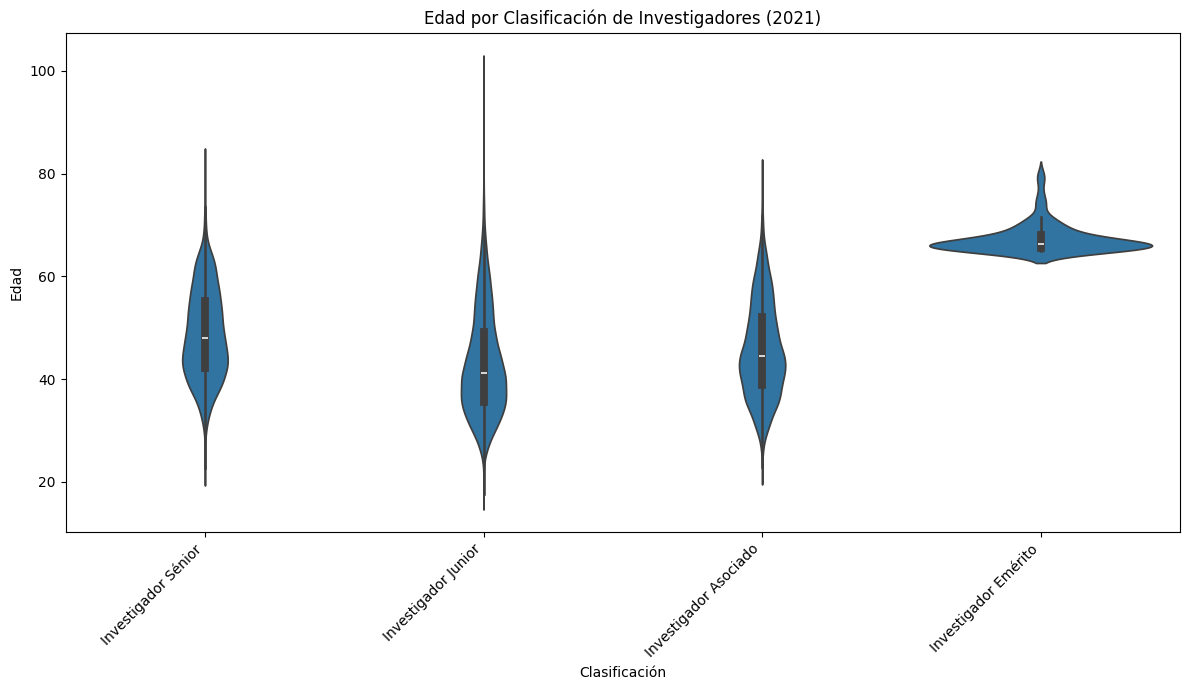

In [76]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='NME_CLASIFICACION_PR', y='EDAD_ANOS_PR', data=df_2021_filtered.dropna(subset=['EDAD_ANOS_PR', 'NME_CLASIFICACION_PR']))
plt.title('Edad por Clasificación de Investigadores (2021)')
plt.xlabel('Clasificación')
plt.ylabel('Edad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Los investigadores Eméritos corresponden en su mayoría a edades avanzadas, alrededor de los 65 años. Los investigadores Senior y Asociado se concentran en edades medias, con mayor dispersión, mientras que los Junior corresponden principalmente a la población más joven entre los 30 y 45 años. Esto confirma que la experiencia y el tiempo dedicado a la investigación son determinantes para ascender en la clasificación.

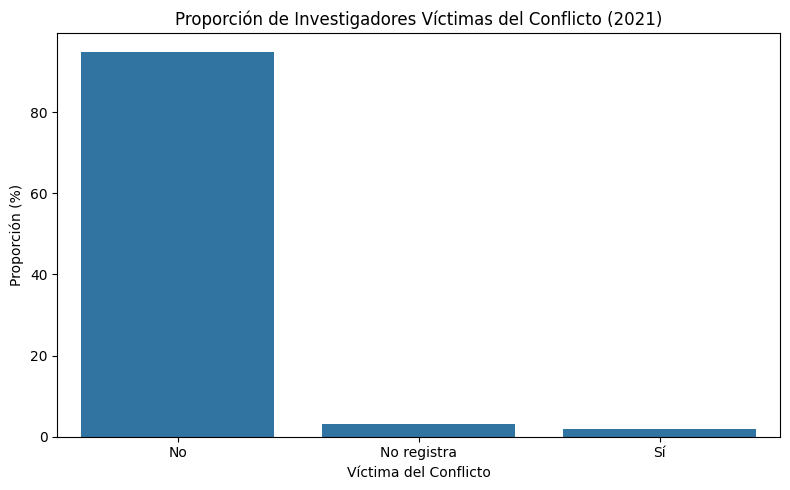

In [77]:
# Proportion of researchers who are victims of conflict
conflict_proportion = df_2021_filtered['ID_VICTIMA_CONFLICTO'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=conflict_proportion.index, y=conflict_proportion.values)
plt.title('Proporción de Investigadores Víctimas del Conflicto (2021)')
plt.xlabel('Víctima del Conflicto')
plt.ylabel('Proporción (%)')
plt.tight_layout()
plt.show()

La participación de víctimas del conflicto armado en el sistema de investigadores es muy baja. Más del 90% de los registros no reporta pertenecer a esta condición.

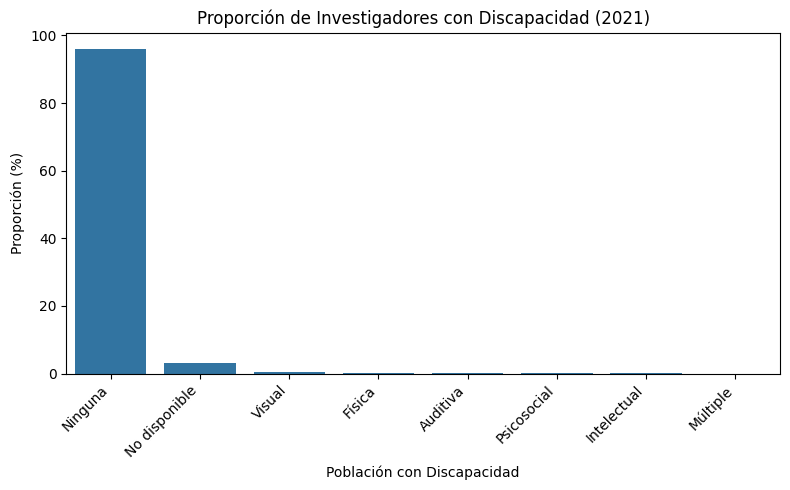

In [78]:
# Proportion of researchers with disabilities
disability_proportion = df_2021_filtered['TXT_POBLACION_DISCA'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=disability_proportion.index, y=disability_proportion.values)
plt.title('Proporción de Investigadores con Discapacidad (2021)')
plt.xlabel('Población con Discapacidad')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El gráfico muestra que la gran mayoría de los investigadores no reporta tener ninguna discapacidad.

Entre aquellos que sí declaran alguna, las discapacidades más comunes son la visual y la física.
Es importante destacar que existe una categoría considerable de "no disponible", lo que sugiere que una parte importante de los datos sobre discapacidad no fue reportada o no está especificada.

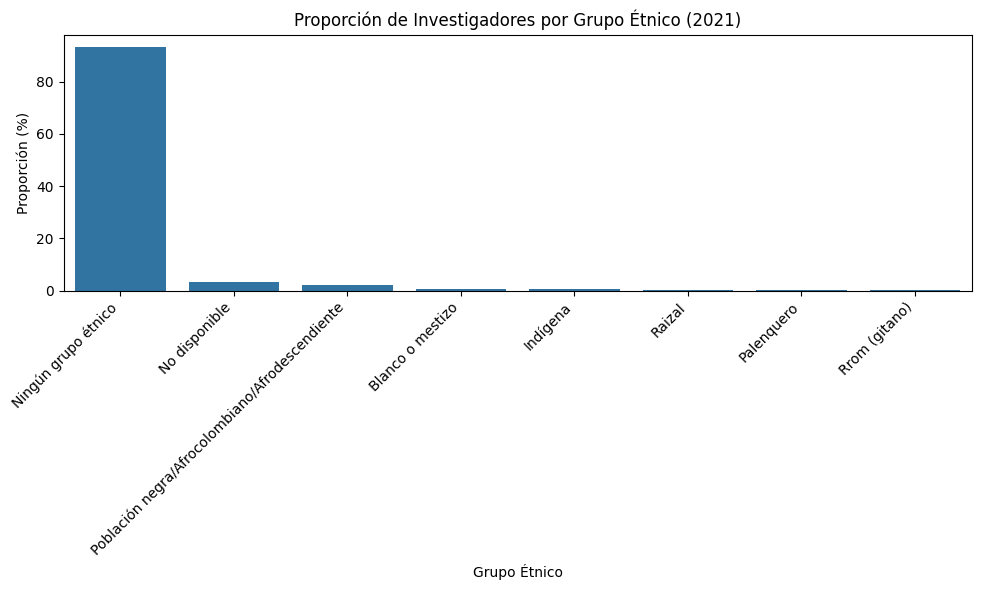

In [79]:
# Proportion of researchers by ethnic group
ethnic_proportion = df_2021_filtered['TXT_GRUPO_ETNICO'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=ethnic_proportion.index, y=ethnic_proportion.values)
plt.title('Proporción de Investigadores por Grupo Étnico (2021)')
plt.xlabel('Grupo Étnico')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Los grupos étnicos tienen una representación muy baja, al igual que en el gráfico de discapacidad.